# Project Title: Evaluating Player Performance and Salary Value in the NBA (1950–2023)
## Team Members
- Ashley Kang: ashleykg
- Chloe Yueh: yyueh
- Min-Yi Chen: minyi

## Overview
This project focuses on the evolution of the NBA. We aim to explore how player statistics and game styles have changed over decades. More importantly, we want to combine performance data with salary data to understand the value of players. Our goal is to merge two datasets: player seasonal player stats, and player salaries. By creating this combined dataset, we can analyze the correlation between a player's performance (such as points and wins) and their financial compensation.

## Motivation
The NBA is one of the most data-rich sports leagues in the world that allows for interesting analysis. Teams and analysts rely heavily on statistics to make decisions about players' contracts and game strategy. So we are interested in whether the performance of players actually reflects what players are paid or whether factors like fame or position play a bigger role. This project also gives us a chance to practice merging datasets with different structures, handling missing data that comes from rule changes over time, and building visualizations that reveal trends across NBA history.

## Real-World questions
By merging player performance data with financial salary records, we aim to investigate the economic efficiency of the NBA labor market. Specifically, we generated the following three questions to explore the relationship between on-court value and financial compensation:

- Does a higher salary guarantee better performance efficiency? Teams spend a lot of money on star players, but are they actually getting what they pay for? We want to see whether the highest-paid players are truly the most efficient contributors, or if there are cheaper players who provide just as much value.
- Is there a correlation between the salary of players and their age? Young players on rookie contracts are often underpaid, while aging players sometimes hold onto large contracts past their prime. We want to understand at what point in a player's career their salary peaks, and how this pattern looks across different eras of the league.
- Do more consistent players earn higher salaries than the ones that do not? Using score data, we want to find out whether teams pay more for players who perform at a steady level every game, or if consistency does not actually matter that much when it comes to salary.

## Data Sources:
Both of our datasets come from the same Kaggle collection:  **NBA Players & Team Data dataset** (https://www.kaggle.com/datasets/loganlauton/nba-players-and-team-data)

**Dataset 1:**
NBA Player Stats (1950 - 2022): This dataset provides seasonal summary data for every NBA player from the 1950 season through 2022. Each row represents one player in one season. It includes traditional box score averages like points, rebounds, assists, steals, and blocks, as well as shooting percentages.
URL: https://www.kaggle.com/datasets/loganlauton/nba-players-and-team-data?select=NBA+Player+Stats%281950+-+2022%29.csv

**Dataset 2:**
NBA Salaries(1990-2023): This dataset contains each player's annual salary. It also includes an inflation adjusted salary column, which allows fair comparisons across different decades.
URL: https://www.kaggle.com/datasets/loganlauton/nba-players-and-team-data?select=NBA+Salaries%281990-2023%29.csv

The 2 selected dataset complement each other because they are both aggregated on a seasonal and individual player level. By merging the two, we can create a better dataset that we can compare what a player did on the court with their salaries.

*Note: Originally, we wanted to include the NBA Player Box Score Stats(1950 - 2022) dataset too, but realized that it is game-by-game data and does not match the granularity of the other 2 datasets. So we decided to exclude it in the end.*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# box_score = pd.read_csv("NBA Player Box Score Stats(1950 - 2022).csv")
stat = pd.read_csv("NBA Player Stats(1950 - 2022).csv")
salaries = pd.read_csv("NBA Salaries(1990-2023).csv")

### Check Column Names

In [6]:
stat.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Season', 'Player', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
salaries.columns

Index(['Unnamed: 0', 'playerName', 'seasonStartYear', 'salary',
       'inflationAdjSalary'],
      dtype='object')

### Check Shape of the Datasets

In [8]:
# print(box_score.shape)
print(stat.shape)
print(salaries.shape)

(28237, 32)
(15857, 5)


### Check values of all two datasets

In [9]:
# stat.info()

# Count missing values in each column
print("Missing values per column:")
missing_counts = stat.isnull().sum()
missing_pct = (missing_counts / len(stat)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing values per column:
      Missing Count  Percentage
3P%            9535   33.767752
GS             6417   22.725502
3P             5770   20.434182
3PA            5770   20.434182
TOV            5052   17.891419
ORB            3900   13.811666
DRB            3900   13.811666
STL            3900   13.811666
BLK            3900   13.811666
FT%            1120    3.966427
MP              501    1.774268
TRB             312    1.104933
2P%             202    0.715373
FG%             129    0.456847
eFG%            129    0.456847


In [10]:
# salaries.info()

# Count missing values in each column
print("Missing values per column:")
missing_counts = salaries.isnull().sum()
missing_pct = (missing_counts / len(salaries)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing values per column:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


### Merge the two datasets

1. First, we identified the columns we need to answer our three questions. 
2. We will be merging on the season year and player name columns and then add on the necessary columns to the dataset. 

In [11]:
salaries.columns

Index(['Unnamed: 0', 'playerName', 'seasonStartYear', 'salary',
       'inflationAdjSalary'],
      dtype='object')

In [12]:
stat.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Season', 'Player', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [13]:
stat_filtered = stat[
    [
        "Player",
        "Season",
        "Pos",
        "Age",
        "Tm",
        "G",
        "GS",
        "MP",
        "FG",
        "FGA",
        "FG%",
        "FT",
        "FTA",
        "FT%",
        "PTS",
    ]
]

salaries_filtered = salaries[["playerName", "seasonStartYear",
                              "salary", "inflationAdjSalary"]]

In [14]:
stat_filtered = stat_filtered.rename(
    columns={"Player": "player", 
             "Season": "season"}
)

salaries_filtered = salaries_filtered.rename(
    columns={"seasonStartYear": "season", 
             "playerName": "player"}
)

In [15]:
stat_filtered["season"] = stat_filtered["season"].astype(int)
salaries_filtered["season"] = salaries_filtered["season"].astype(int)

stat_filtered["player"] = stat_filtered["player"].str.strip()
salaries_filtered["player"] = salaries_filtered["player"].str.strip()

In [16]:
merged_df = pd.merge(
    stat_filtered,
    salaries_filtered, 
    on=['player', 'season'],
    how='left'
)

### Check the merged dataset and clean additional values

In [17]:
merged_df.head()

,player,season,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,FT,FTA,FT%,PTS,salary,inflationAdjSalary
0,Curly Armstrong,1950,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,0.279,170.0,241.0,0.705,458.0,NaN,NaN
1,Cliff Barker,1950,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,0.372,75.0,106.0,0.708,279.0,NaN,NaN
2,Leo Barnhorst,1950,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,0.349,90.0,129.0,0.698,438.0,NaN,NaN
3,Ed Bartels,1950,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,0.256,19.0,34.0,0.559,63.0,NaN,NaN
4,Ed Bartels,1950,F,24.0,DNN,13.0,NaN,NaN,21.0,82.0,0.256,17.0,31.0,0.548,59.0,NaN,NaN


In [18]:
print(f"Shape of the Merged Dataframe: {merged_df.shape}")
print()
merged_df.info()

Shape of the Merged Dataframe: (28770, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28770 entries, 0 to 28769
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              28770 non-null  object 
 1   season              28770 non-null  int64  
 2   Pos                 28770 non-null  object 
 3   Age                 28770 non-null  float64
 4   Tm                  28770 non-null  object 
 5   G                   28770 non-null  float64
 6   GS                  22353 non-null  float64
 7   MP                  28269 non-null  float64
 8   FG                  28770 non-null  float64
 9   FGA                 28770 non-null  float64
 10  FG%                 28640 non-null  float64
 11  FT                  28770 non-null  float64
 12  FTA                 28770 non-null  float64
 13  FT%                 27635 non-null  float64
 14  PTS                 28770 non-null  float64
 15  salary   

In [19]:
# Count missing values in each column
print("Missing values per column:")
missing_counts = merged_df.isnull().sum()
missing_pct = (missing_counts / len(merged_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing values per column:
                    Missing Count  Percentage
salary                      14833   51.557178
inflationAdjSalary          14833   51.557178
GS                           6417   22.304484
FT%                          1135    3.945082
MP                            501    1.741397
FG%                           130    0.451860


#### 1. **Filter Salary Dataset (Pre-1940 Seasons and Missing Salaries)**  
    The salary dataset’s seasons start in 1940, so we will remove all rows with seasons before 1940. Since salary is one of our most important variables, any rows with missing salary values would not be helpful. Therefore, this step should remove most of the rows with missing values.

In [20]:
salaries_filtered['season'].describe()

count    15857.000000
mean      2007.160434
std          9.489159
min       1990.000000
25%       1999.000000
50%       2008.000000
75%       2016.000000
max       2021.000000
Name: season, dtype: float64

In [21]:
merged_df = merged_df[merged_df["season"] >= 1990]
merged_df.shape

(19190, 17)

In [22]:
merged_df = merged_df.dropna(subset=["salary", "inflationAdjSalary"])
merged_df.shape

(13937, 17)

#### 2. **Convert Salary and inflationAdjSalary columns' types into float**  
    The data type of the salary and inflationAdjSalary columns are in strings. So we converted them into integers.

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13937 entries, 9580 to 27957
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              13937 non-null  object 
 1   season              13937 non-null  int64  
 2   Pos                 13937 non-null  object 
 3   Age                 13937 non-null  float64
 4   Tm                  13937 non-null  object 
 5   G                   13937 non-null  float64
 6   GS                  13937 non-null  float64
 7   MP                  13937 non-null  float64
 8   FG                  13937 non-null  float64
 9   FGA                 13937 non-null  float64
 10  FG%                 13902 non-null  float64
 11  FT                  13937 non-null  float64
 12  FTA                 13937 non-null  float64
 13  FT%                 13609 non-null  float64
 14  PTS                 13937 non-null  float64
 15  salary              13937 non-null  object 
 16  inflat

In [24]:
merged_df['inflationAdjSalary']

9580       $996,827
9581     $1,881,882
9582     $2,543,393
9583     $1,653,775
9584     $1,140,535
            ...    
27953    $9,080,829
27954    $2,606,136
27955    $2,606,136
27956    $8,199,677
27957    $8,199,677
Name: inflationAdjSalary, Length: 13937, dtype: object

In [25]:
merged_df["salary"] = (
    merged_df["salary"]
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

merged_df["inflationAdjSalary"] = (
    merged_df["inflationAdjSalary"]
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

<>:3: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:9: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:3: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:9: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
/var/folders/c4/zf3v9kks7rq7d5s6m88g2mgw0000gn/T/ipykernel_33653/3318981744.py:3: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  .replace('[\$,]', '', regex=True)
/var/folders/c4/zf3v9kks7rq7d5s6m88g2mgw0000gn/T/ipykernel_33653/3318981744.py:9: SyntaxWarning: "\$" is an invalid escape 

In [26]:
merged_df['inflationAdjSalary']


9580      996827.0
9581     1881882.0
9582     2543393.0
9583     1653775.0
9584     1140535.0
           ...    
27953    9080829.0
27954    2606136.0
27955    2606136.0
27956    8199677.0
27957    8199677.0
Name: inflationAdjSalary, Length: 13937, dtype: float64

#### 3. **Impute missing values if possible**
    There are a few missing values for FT% when FG and FGA values are present. Same with the FT% column. We can impute the missing values by calculating them manually. 

In [27]:
merged_df.describe()

,season,Age,G,GS,MP,FG,FGA,FG%,FT,FTA,FT%,PTS,salary,inflationAdjSalary
count,13937.000000,13937.000000,13937.000000,13937.000000,13937.000000,13937.000000,13937.000000,13902.000000,13937.000000,13937.000000,13609.000000,13937.000000,1.393700e+04,1.393700e+04
mean,2006.824568,26.715577,52.162015,26.755973,1268.164024,199.955012,437.052163,0.445132,98.989094,131.122336,0.731494,532.640669,4.591022e+06,6.312120e+06
std,9.389984,4.105775,24.487511,28.784684,888.539716,174.004922,369.604378,0.084704,106.218923,135.347698,0.132208,470.342144,5.854194e+06,7.269039e+06
min,1990.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.706000e+03,4.824000e+03
25%,1999.000000,23.000000,32.000000,1.000000,487.000000,58.000000,135.000000,0.407000,23.000000,33.000000,0.667000,154.000000,1.034500e+06,1.639040e+06
50%,2007.000000,26.000000,57.000000,14.000000,1169.000000,155.000000,345.000000,0.444000,63.000000,87.000000,0.751000,408.000000,2.350000e+06,3.598972e+06
75%,2015.000000,30.000000,74.000000,51.000000,1968.000000,300.000000,654.000000,0.485000,138.000000,186.000000,0.818000,798.000000,5.500000e+06,8.092493e+06
max,2021.000000,43.000000,85.000000,83.000000,3533.000000,1034.000000,2173.000000,1.000000,756.000000,972.000000,1.000000,2832.000000,4.578097e+07,6.125856e+07


In [28]:
merged_df[['FT', "FTA", "FT%"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13937 entries, 9580 to 27957
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FT      13937 non-null  float64
 1   FTA     13937 non-null  float64
 2   FT%     13609 non-null  float64
dtypes: float64(3)
memory usage: 435.5 KB


In [29]:
merged_df["FG%"] = merged_df["FG"] / merged_df["FGA"]

In [30]:
merged_df["FG%"].isna().sum()
merged_df[merged_df["FG%"].isna()][["FG", "FGA"]].head()

,FG,FGA
10267,0.0,0.0
10507,0.0,0.0
11429,0.0,0.0
12676,0.0,0.0
12884,0.0,0.0


There are still a few NA values in the FG% column because the FG and FGA values are 0. We can also remove these rows. 

In [31]:
merged_df = merged_df.dropna(subset=["FG%"])
merged_df.shape
# merged_df["FG%"].isna().sum()

(13902, 17)

Repeat the same for the FT% column. 

In [32]:
merged_df[['FT', "FTA", "FT%"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13902 entries, 9580 to 27957
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FT      13902 non-null  float64
 1   FTA     13902 non-null  float64
 2   FT%     13604 non-null  float64
dtypes: float64(3)
memory usage: 434.4 KB


In [33]:
merged_df["FT%"] = merged_df["FT"] / merged_df["FTA"]
merged_df["FT%"].isna().sum()
# merged_df[merged_df["FT%"].isna()][["FT", "FTA"]].head()

np.int64(298)

In [34]:
merged_df = merged_df.dropna(subset=["FT%"])
merged_df.shape
# merged_df["FT%"].isna().sum()

(13604, 17)

#### 4. **Remove rows with non meaningful values**
    For the MP column (minutes played), there are values like 0. We will remove these rows, as zero minutes played is not meaningful for our analysis.

In [35]:
merged_df = merged_df[merged_df["MP"] > 0]
merged_df.shape

(13604, 17)

### Summary of final merged df

In [36]:
merged_df.describe()

,season,Age,G,GS,MP,FG,FGA,FG%,FT,FTA,FT%,PTS,salary,inflationAdjSalary
count,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,13604.000000,1.360400e+04,1.360400e+04
mean,2006.793370,26.739929,53.314540,27.409218,1298.411717,204.770141,447.529550,0.447186,101.411497,134.330785,0.731557,545.498824,4.673312e+06,6.424900e+06
std,9.393558,4.102379,23.623133,28.826680,877.773509,173.343746,367.904648,0.076080,106.362773,135.412597,0.132172,468.737462,5.889934e+06,7.306459e+06
min,1990.000000,18.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.706000e+03,4.824000e+03
25%,1999.000000,24.000000,34.000000,2.000000,527.000000,64.000000,148.000000,0.408761,25.000000,36.000000,0.666667,170.000000,1.081200e+06,1.696499e+06
50%,2007.000000,26.000000,58.000000,15.000000,1206.000000,161.000000,356.000000,0.444444,66.000000,90.000000,0.751462,423.000000,2.400000e+06,3.730078e+06
75%,2015.000000,30.000000,75.000000,53.000000,1988.000000,305.000000,665.000000,0.484730,141.000000,190.000000,0.818182,810.000000,5.632200e+06,8.248559e+06
max,2021.000000,43.000000,85.000000,83.000000,3533.000000,1034.000000,2173.000000,1.000000,756.000000,972.000000,1.000000,2832.000000,4.578097e+07,6.125856e+07


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13604 entries, 9580 to 27957
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              13604 non-null  object 
 1   season              13604 non-null  int64  
 2   Pos                 13604 non-null  object 
 3   Age                 13604 non-null  float64
 4   Tm                  13604 non-null  object 
 5   G                   13604 non-null  float64
 6   GS                  13604 non-null  float64
 7   MP                  13604 non-null  float64
 8   FG                  13604 non-null  float64
 9   FGA                 13604 non-null  float64
 10  FG%                 13604 non-null  float64
 11  FT                  13604 non-null  float64
 12  FTA                 13604 non-null  float64
 13  FT%                 13604 non-null  float64
 14  PTS                 13604 non-null  float64
 15  salary              13604 non-null  float64
 16  inflat

## Data Visualization

In [38]:
# Set the style for the plots
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Visualization 1 - The Distribution of Salaries

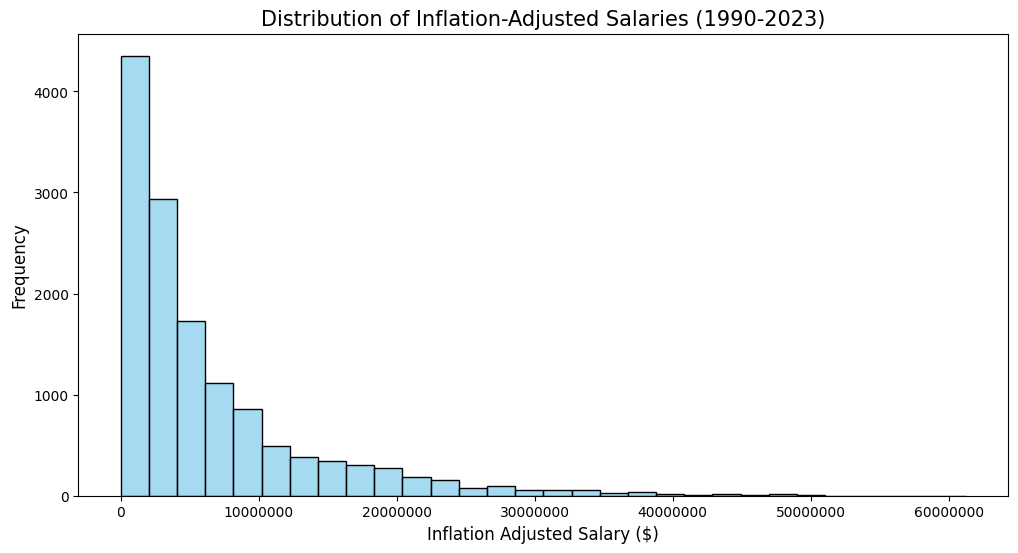

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram with a Kernel Density Estimate (KDE) overlay
sns.histplot(merged_df['inflationAdjSalary'], kde=True, bins=30, color='skyblue')

plt.title('Distribution of Inflation-Adjusted Salaries (1990-2023)', fontsize=15)
plt.xlabel('Inflation Adjusted Salary ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Formatting the x-axis to be more readable (in millions)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

We first looked at the distribution of player salaries (adjusted for inflation) in the NBA to understand how salaries are spread across players. The histogram shows a clear right-skewed pattern. Most players earn salaries on the lower end, while a small number of players earn very high salaries. Because a few large values can pull the average upward, the mean salary may not represent a typical player very well. For this reason, the median salary is likely a better measure of a typical player’s earnings.

### Visualization 2 - Salary vs. Age

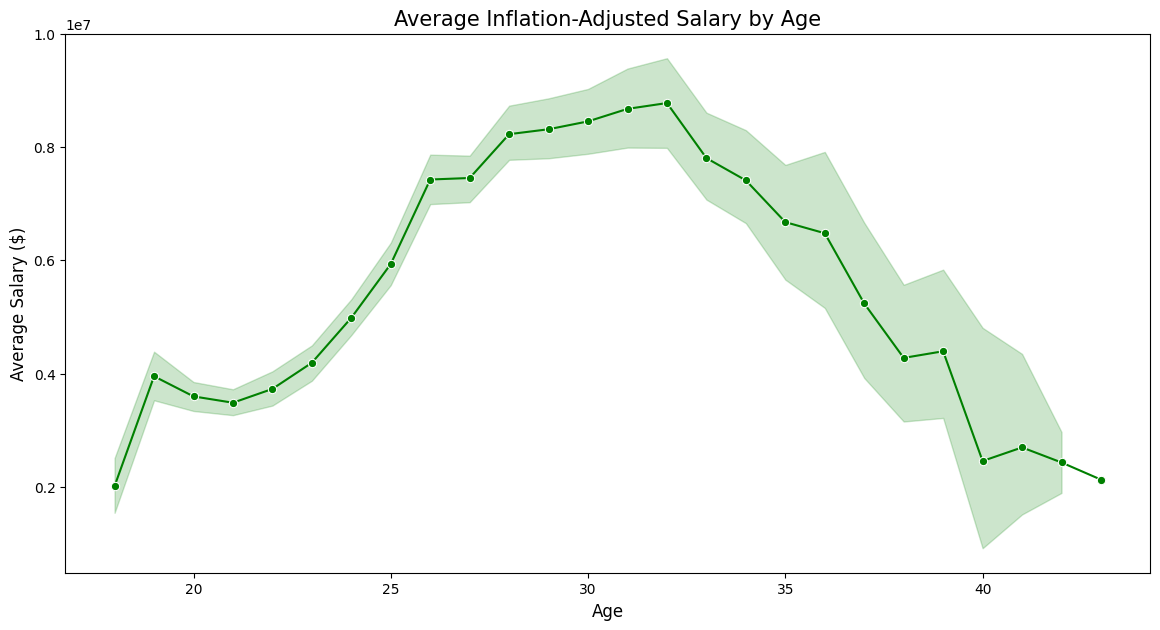

In [49]:
plt.figure(figsize=(14, 7))

# Line plot of average inflation-adjusted salary by age
sns.lineplot(data=merged_df, x='Age', y='inflationAdjSalary', marker='o', color='green')

plt.title('Average Inflation-Adjusted Salary by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)

plt.show()

To study how age relates to salary in the NBA, we plotted the average inflation-adjusted salary by player age. The graph shows that salaries generally increase from the early 20s and reach their highest point around ages 30 to 32. After that, the average salary starts to decrease. This suggests that players tend to earn the most during their prime years and earn less as they get older.

### Visualization 3 - Performance (Points) vs. Salary

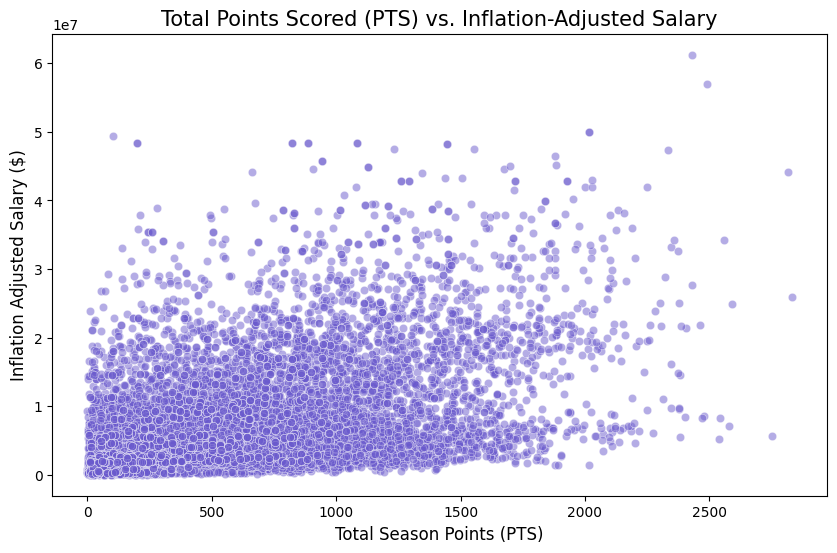

In [54]:
plt.figure(figsize=(10, 6))

# Scatter plot of total points scored vs. inflation-adjusted salary
sns.scatterplot(data=merged_df, x='PTS', y='inflationAdjSalary', alpha=0.5, color='slateblue')

plt.title('Total Points Scored (PTS) vs. Inflation-Adjusted Salary', fontsize=15)
plt.xlabel('Total Season Points (PTS)', fontsize=12)
plt.ylabel('Inflation Adjusted Salary ($)', fontsize=12)

plt.show()

To examine the relationship between performance and salary in the NBA, we used total points scored (PTS) as a simple measure of on-court output. The scatter plot shows a general positive relationship: players who score more points tend to earn higher salaries. However, the points are widely spread, meaning the relationship is not perfect. Some players score many points but still earn relatively lower salaries, while others earn high salaries even with fewer total points. This suggests that scoring is important for salary, but other factors also affect how much players are paid.

### Visualization 4 - Correlation Heatmap

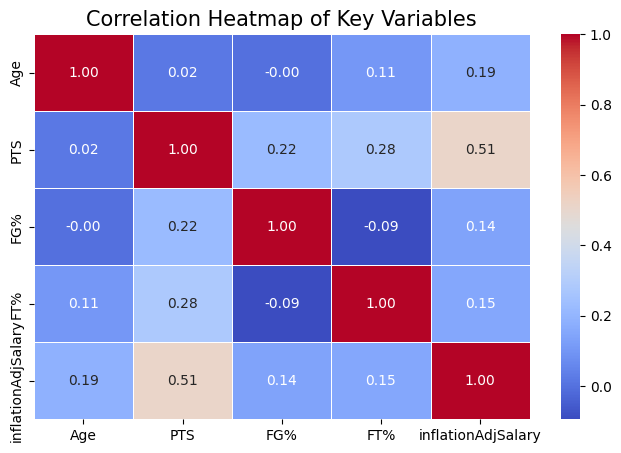

In [56]:
plt.figure(figsize=(8, 5))

# Select key numeric columns for correlation analysis
cols = ['Age', 'PTS', 'FG%', 'FT%', 'inflationAdjSalary']
correlation_matrix = merged_df[cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Key Variables', fontsize=15)
plt.show()

The correlation heatmap identifies Total Points (PTS) as the strongest driver of salary (correlation: 0.51). In contrast, variables like Age and shooting efficiency (FG%, FT%) show weak correlations (all below 0.20). This confirms that high-volume scoring is a far better predictor of earnings than efficiency or experience.